In [1]:
#En este problema hace tirar 10 veces a cada jugadora y se queda con la que más enceste logre
import  numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(102191)

## Problema Cazatalentos buscando a “La verdadera mejor encestadora”
Se supone una lógica _similar_ que en los ejemplos [mostrados en la presentación del problema](https://storage.googleapis.com/open-courses/dmeyf2023-8a1e/Cazatalentos_UBA2023.pdf).  
Se asume distribuciones iguales / similares en los diferentes pueblos y ciudades.  
Se utiliza la distribución binomial para calcular la probabilidad de enceste.  
Para cálculos comparativos, se utiliza: jugadora promedio tiene entre 0,6-0,7 y se considera un gran jugador si tiene un de enceste mayor a 0,8.  
Además todos tienen un índice de enceste menor a 0,85.  
media = n.p  
varianza = n.p.q  
Se aproximan a distribuciones normales dado que en todos los casos (salvo Cz4)   
n.p y n.q > 10   
Donde:  
n = número de intentos  
p = probabilidad de enceste  
q = probabilidad de no enceste  
Además   
Cz = Cazatalentos   
Estos resultados son relativos a los puntos de cortes elegidos, al riesgo dispuesto a correr y la distribución del pelotón, entre otras variables. 



In [155]:
#Definición de funciones
#Funcion de tirar
def ftirar(prob, qty): 
  return sum(np.random.rand(qty) < prob)
#Creación del vector con la funcion ftirar
vec_ftirar = np.vectorize(ftirar)

#funcion para los parametros de la binomial (calculo de z_desv suponiendo n>30)
def p_bino(exitos,casos_totales): 
    p = exitos/casos_totales
    q= 1-p
    desv = round(math.sqrt(p*q*casos_totales),2)   
    porc_inf = round(desv/exitos*100,2)
    return p,q,desv,porc_inf

# defino los jugadoras, esto me sirve para comparar pools de jugadoras diferentes
def players(mejor=0.7,peloton=np.array(range(501, 600)) / 1000):
    jugadoras = np.append(mejor, peloton)    
    return jugadoras

#Probabilidad de elegir a la mejor en función del número de tiros, cantidad de jugadores en n repeticiones
def p_correcta(tiros=[100],jugadoras=players(),repetciones=1000):
  print("Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones")
  for nt in tiros:      
    aciertos_mejor = 0
    primera_ganadora = 0
    for i in range(repetciones):
      vaciertos = vec_ftirar(jugadoras, nt)
      mejor_ronda= np.argmax(vaciertos)
      aciertos_mejor += vaciertos[0]        
      if mejor_ronda == 0:
        primera_ganadora += 1
    print(nt, "\t", primera_ganadora/repetciones, "\t \t", aciertos_mejor/repetciones,"\t", aciertos_mejor/nt/repetciones,"\t",repetciones)
    
#Probabilidad de elegir a la mejor en un subgrupo
def sub_grupos(tiros=[100],jugadoras=players(),repeticiones=1000,corte_jugadores=5):
    for nt in tiros:
        contador_mejor_en_grupo = 0
        for r in range(repeticiones):
            vaciertos = vec_ftirar(jugadoras, nt)
            maximos = np.argpartition(vaciertos, -corte_jugadores)[-corte_jugadores:]#Seleccion de maximos
            if 0 in maximos:
                contador_mejor_en_grupo += 1
        print(contador_mejor_en_grupo/repeticiones)

#Calculo del desvio para graficos 
def desvio_grap(lista):
    calc = math.sqrt(lista[1]*(1-lista[1])*lista[0])/lista[0]
    return round(calc,5)

In [106]:
'''Cz 1: 100 jugadores, 100 tiros por jugadora. 
Resultados:
Cantidad / Num de aciertos
1 / 80 
2 / 79 
2 / 78
Para empezar y teniendo utilizando como base las propiedades de mejor jugadora =0.8, jugadora promedio = 0.6-0.7
utilizando esta estrategia vamos a elegir la mejor jugadora del grupo aproximadamente el 72% de los casos. 
Estimadores obtenidos:
p = 0.8 s=0.04 p mejor del grupo = ~0.72
'''
cz1_j = {"A":80,
         "B":79,
         "C":78} #Aciertos de las jugadoras
tiros = 100 #Cantidad de tiros 

for j in cz1_j:
    p,q,desv,porc_inf = p_bino(cz1_j[j],tiros)
    print("p calculada: {}, aciertos: {}, desvio {}, desvio porcentual: {}".format(p,cz1_j[j],desv,porc_inf) ) 
    
#Probabilidad de elejir a la correcta con este método en 1000 simulaciones: 
print("Para 100 personas, con 1000 simulaciones")
tiros = [100]
mejor = 0.8
no_mejor = np.array(range(601, 700)) / 1000
jugadoras_1 = players(mejor,no_mejor)
p_correcta(tiros,jugadoras_1,1000)



p calculada: 0.8, aciertos: 80, desvio 4.0, desvio porcentual: 5.0
p calculada: 0.79, aciertos: 79, desvio 4.07, desvio porcentual: 5.15
p calculada: 0.78, aciertos: 78, desvio 4.14, desvio porcentual: 5.31
Para 100 personas, con 1000 simulaciones
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.714 	 	 79.968 	 0.79968 	 1000


'Al tener tanas repeticiones del grupo del pelotón, vamos a obtener varios valores\nen la parte derecha de la curva p=0.7 y esos valores competiran contra el valor de \nla mejor jugadora (p=0.8)'

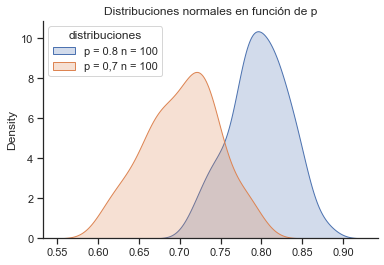

In [107]:
'''Hay que tener en cuenta que esto es un problema de separación:
Si asumimos que hay un grupo pelotón con valores más bajos que la jugadora más
habilidosa tendríamos una situación como la que se ve en los siguientes gráficos:
Esto es suponiendo un pelotón de p=0.65 (valor promedio del pelotón entre 0.6 y 0.7,
se puede utilizar 0.7 para poner un caso peor, para la separación de grupos)
y una mejor jugadora con p=0.8
(Se utiliza la distribución normal para ejemplificar) 
'''
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig = sns.kdeplot(np.random.normal(0.8, 0.04,100),fill=True)
fig = sns.kdeplot(np.random.normal(0.7, 0.0458,100),fill=True)
plt.title("Distribuciones normales en función de p")
plt.legend(title='distribuciones', loc='upper left', labels=["p = 0.8 n = 100","p = 0,7 n = 100"])

'''Al tener tanas repeticiones del grupo del pelotón, vamos a obtener varios valores
en la parte derecha de la curva p=0.7 y esos valores competirán contra el valor de 
la mejor jugadora (p=0.8)'''

In [109]:
'''Cz 2: 200 jugadores, 100 tiros por jugadora
Resultados:
Cantidad / Num de aciertos
1 / 80 
6 / 79
5 / 78 
En este caso a ser el doble de jugadores la probabilidad de seleccionar al mejor es menor,
al haber más jugadores si buscamos 1 solo jugador bueno, esto se debe a que hay más "intentos"
de jugadoras que no son la mejor y por lo tanto la probabilidad de que alguna de ellas 
obtenga una serie de éxitos consecutivos es mayor.
p = 0.8 s=0.04 p mejor del grupo = ~0.61
'''
cz2_j = {"A":80,
         "B":79,
         "C":78} #Aciertos de las jugadoras, hay más repeticiones en los casos de 70 y 78
tiros = 100 #Cantidad de tiros 

for j in cz2_j:
    p,q,desv,porc_inf = p_bino(cz2_j[j],tiros)
    print("p calculada: {}, aciertos: {}, desvio {}, desvio porcentual: {}".format(p,cz2_j[j],z_desv,porc_inf) ) 
    
#Pero analizando la probabilidad de seleccionar a la mejor, tenemos:

print("Para 200 personas, con 1000 simulaciones")
serie_tiros = [100]
mejor = 0.8
no_mejor2 = np.append(np.array(range(601, 700)),np.array(range(600, 700)))/1000 #Se duplicaron los casos pelotón
jugadoras_2 = players(mejor,no_mejor2)
p_correcta(serie_tiros,jugadoras_2,1000)

p calculada: 0.8, aciertos: 80, desvio 8.11, desvio porcentual: 5.0
p calculada: 0.79, aciertos: 79, desvio 8.11, desvio porcentual: 5.15
p calculada: 0.78, aciertos: 78, desvio 8.11, desvio porcentual: 5.31
Para 200 personas, con 1000 simulaciones
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.615 	 	 80.142 	 0.8014199999999999 	 1000


In [103]:
''' Continuación Cz2
En las 1000 simulaciones se puede observar la diferencia en encontrar a la mejor
utilizando esta metodología.
Con el Cz1 la probabilidad de encontrar a la mejor es de ~0.63
con el Cz2 la probabilidad de encontrar a la mejor es de ~0.52
Aunque los p de enceste de la mejor jugadora fueran iguales, la probabilidad de 
elegirla mediante esta metodología es menor.
En estos dos casos se suma que los valores que estamos tomando de la distribución 
"pelotón" al ser tantas jugadoras, habrá valores altos que son poco probables
en la distribución, esto genera que si la mejor jugadora volviera a tirar
lo más probable es que obtenga menos encestes, la estimación obtenida 
esta sesgada hacia los valores más altos. Esto ocurre para el Cz1 también, pero
en menor medida.
p de mejor jugadora:
Cz1>Cz2
'''

'\nEn las 1000 simulaciones se puede observar la diferencia en encontrar a la mejor\nutlizando esta metodologia.\nCon el Cz1 la probabilidad de encontrar a la mejor es de ~0.63\ncon el Cz2 la probabilidad de encontrar a la mejor es de ~0.52\nAunque los p de enceste de la mejor jugadora fueran iguales, la probabilida de \nelegirla mediante esta metodología es menor.\nEn estos dos casos se suma que los valores que estamos tomando de la distribución \n"pelotón" al ser tantas jugadoras, habrá valores altos que son poco probables\nen la distribución, esto genera que si la mejor jugadora volviera a tirar\nlo más probable es que obtenga menos encestes, la estimación obtenida \nesta sesgada hacia los valores más altos. Esto ocurre para el Cz1 también, pero\nen menor medida.\np de mejor jugadora:\nCz1>Cz2\n'

In [110]:
'''Cz 3: 2 jugadores, 100 tiros:
Cantidad / Num de aciertos
1 / 80 
2 / 75 
Este es el caso contrario al anterior solos dos casos.
Los estimadores serian similares, pero al ser solo dos casos lo más probable es 
que estos valores sean valores promedio de estas jugadoras.
En el caso 1 y 2 si nos ponemos en el caso de que todo el pelotón tenga p = .7,
se puede interpretar como 99 intentos de p = .7.
En 99 intentos vamos a tener una pequeña porción de valores muy altos (por la cantidad
de repeticiones) En este caso al tener solo 2 personas, la probabilidad de que alguno
de estos valores sean valores extremos es más baja.
la probabilidad de elegir a la mejor de este grupo con este método es del ~96% 
Por eso Cz3>Cz1>Cz2
p = 0.8 s=0.04 p mejor del grupo = 0.96
'''
print("Para 2 personas, con 1000 simulaciones")
tiros = [100]
mejor = 0.8
un_no_mejor = .7
jugadoras_3 = players(mejor,un_no_mejor)
p_correcta(tiros,jugadoras_3 ,1000)

Para 2 personas, con 1000 simulaciones
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.966 	 	 79.996 	 0.79996 	 1000


In [111]:
'''Cz 4: 100 jugadores, 10 tiros:
Cantidad / Num de aciertos
1 / 9 
varios con menos de 9.
En este caso la dispersión es enorme.
1ro) El p calculado para este caso es .9 (9/10) y es mayor al de la jugadora estrella,
lo que no debería ser posible. 
2do) La dispersión en los resultados es muy alta al ser tan pocos disparos (como se
demuestra en la tabla que se encuentra debajo) se puede observar que 
el desvío es mucho mayor comparado con los casos anteriores.
Esto hace que el valor obtenido sea menos confiable. La probabilidad de elegir a la mejor
del grupo con este método está alrededor del 15%.

p = 0.9 s=0.095 p mejor del grupo = 0.15
'''
cz4_j = {"A":9,
         "B":8,
         "C":7} #Aciertos de las jugadoras, hay más repeticiones en los casos de 70 y 78
tiros = 10 #Cantidad de tiros 

for j in cz4_j:
    p,q,desv,porc_inf = p_bino(cz4_j[j],tiros)
    print("p calculada: {}, aciertos: {}, desvio {}, desvio porcentual: {}".format(p,cz4_j[j],desv,porc_inf) ) 
    
#Pero analizando la probabilidad de seleccionar a la mejor, tenemos:

print("Para 100 personas, 10 tiros, con 1000 simulaciones")
tiros = [10]
mejor = 0.8
no_mejor = np.array(range(601, 700)) / 1000
jugadoras_4 = players(mejor,no_mejor)
p_correcta(tiros,jugadoras_4,1000)

p calculada: 0.9, aciertos: 9, desvio 0.95, desvio porcentual: 10.56
p calculada: 0.8, aciertos: 8, desvio 1.26, desvio porcentual: 15.75
p calculada: 0.7, aciertos: 7, desvio 1.45, desvio porcentual: 20.71
Para 100 personas, 10 tiros, con 1000 simulaciones
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
10 	 0.162 	 	 7.94 	 0.794 	 1000


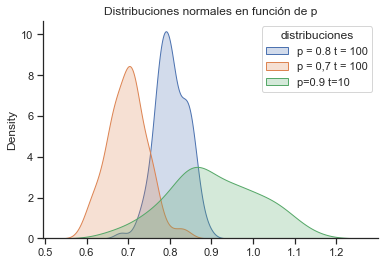

In [115]:
'''Continuación Cz4
Este caso a pesar de tener el p calculado más alto, la dispersión es sustancialmente
más grande, esto se ejemplifica en los gráficos siguientes
Para empezar, no es posible obtener valores iguales o mayores a 1
La densidad esta menos concentrada la varianza de la jugadora elegida es mucho más grande
Observación: En este caso utilizar la distribución normal para ejemplificar se encuentra
más alejado de la realidad (q.n < 10 y menor a 5) pero es visualmente explicativo. 

Cz3>Cz1>Cz2>Cz4
'''

fig = sns.kdeplot(np.random.normal(0.8, 0.04,100),fill=True)
fig = sns.kdeplot(np.random.normal(0.7, 0.0458,100),fill=True)
fig = sns.kdeplot(np.random.normal(0.9, 0.095,100),fill=True)
plt.title("Distribuciones normales en función de p")
plt.legend(title='distribuciones', loc='upper right', labels=["p = 0.8 t = 100","p = 0,7 t = 100","p=0.9 t=10"])

In [117]:
'''Cz 5: 100 jugadores, 100 tiros. Se queda con los 5 mejores de la primera ronda. Dos rondas más de 100 tiros
Resultados
Jugador / Num de aciertos 1 / Num de aciertos 2 / Num de aciertos 3 
A,85,69,70
B,84,74,76
C,84,74,75
D,82,70,73
E,81,75,74
En este caso hay que tener presente que en el primer corte hay una probabilidad de aproximadamente 0.87
de dejar afuera a la mejor jugadora. 
Si la mejor jugadora quedara en el bloque de corte y suma los valores de todos los aciertos
la probabilidad de elegir a la mejor del grupo es ~0.84*0.999 = ~0.83 el factor limitante
es la primera selección
la elegida por el Cz es la A: 
p= 0.75 y s=0.0250
Si tuviera que recomendar a la seleccionadora le recomendaría la B/C:
p=0.78 t s=0.0255 p mejor del grupo = 0.83
Cz3>Cz5>Cz1>Cz2>Cz4
'''
print("probabilidad de que el mejor este en el grupo de 5")
sub_grupos([100],jugadoras_100,1000,5) #Numero de tiros, boloque de jugadoras, repeticiones, top de corte


cz5_j = {"A":[85,69,70],
           "B":[84,74,76],
           "C":[84,74,75],
           "D":[82,70,73],
           "E":[81,75,74]}

# Función para calcular sumando todos los aciertos y tiros realizados por cada jugadora
#Esto es un estimador más solido 
tiros = 300
def propiedades(jugador):
    print("p calc, aciertos,  std, desvio porcentual")
    for j in jugador:        
        aciertos = sum(jugador[j])
        proba = aciertos/tiros
        desvio = math.sqrt(proba*(1-proba)*tiros)
        print(round(proba,2),"\t", aciertos,"\t",round(desvio,2),"\t",round(desvio/aciertos*100,2),)
    
propiedades(cz5_j)
#Simulando con 5 casos seleccionados:
mejor = 0.8
cuatro_mas = np.array(range(696, 700)) / 1000
jugadoras_5 = players(mejor,cuatro_mas)
p_correcta([300],jugadoras_5,1000)


probabilidad de que el mejor este en el grupo de 5
0.841
p calc, aciertos,  std, desvio porcentual
0.75 	 224 	 7.53 	 3.36
0.78 	 234 	 7.17 	 3.07
0.78 	 233 	 7.21 	 3.1
0.75 	 225 	 7.5 	 3.33
0.77 	 230 	 7.33 	 3.19
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
300 	 0.993 	 	 240.108 	 0.80036 	 1000


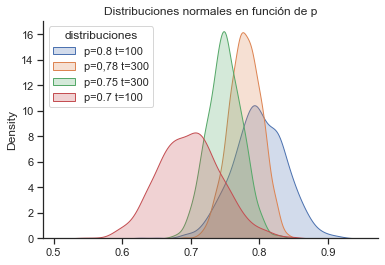

In [125]:
fig = sns.kdeplot(np.random.normal(0.8, 0.04,1000),fill=True)
fig = sns.kdeplot(np.random.normal(0.78, 0.0239,1000),fill=True)
fig = sns.kdeplot(np.random.normal(0.75, 0.025,1000),fill=True)
fig = sns.kdeplot(np.random.normal(0.7, 0.0458,1000),fill=True)
plt.title("Distribuciones normales en función de p")
plt.legend(title='distribuciones', loc='upper left', labels=["p=0.8 t=100","p=0,78 t=300","p=0.75 t=300","p=0.7 t=100"])

In [ ]:
'''Continua Cz5:
Las distribuciones del Cz5 tienen menos dispersión, esto genera 
que la jugadora elegida tenga los parámetros calculados más confiables que en los 
Cz anteriores. 
En el caso de la Cz5 la probabilidad de que la distribución sea la calculada es de:
Cz5: p= 0.75 y s=0.0250 p mejor del grupo ~0.84*0.999 = ~0.83 en este caso estoy
compensando una pérdida de 5% de enceste con una mejora en que la seleccionada 
juegue como lo demostró (sea la mejor de su grupo) del ~10% vs Cz1
'''

In [158]:
'''Cz 6: Habla de experiencia y habla de intuición 100 jugadores, elige una al azar
consigue 80 tiros de 100
Este caso es similar al de Cz 3 que tiene solo dos personas. Al ser una persona que 
realiza los tiros, lo más probable es asumir un valor promedio de enceste
p = 0.8 s=0.04
Es probable que este valor sea el valor promedio de esa jugadora,
también es probable que no sea la mejor tiradora de ese pueblo
Cz6>Cz3>Cz5>Cz1>Cz2>Cz4
'''
 

'Cz 6: Habla de experiencia y habla de intuición 100 jugadores, elige una al azar\nconsigue 80 tiros de 100\nEste caso es similar al de Cz 3 que tiene solo dos personas. Al ser una persona que \nrealiza los tiros, lo más probable es asumir un valor promedio de enceste\np = 0.8 s=0.04\nEs probable que este valor sea el valor promedio de esa jugadora,\ntambién es probable que no sea la mejor tiradora de ese pueblo\nCz6>Cz3>Cz5>Cz1>Cz2>Cz4\n'

In [128]:
'''Cz 7: 100 jugadores, 100 tiros, 
top 5 segunda ronda de 100 tiros mejor 80: Esa es la elegida 
(80,79,78,77,72)
No tengo información sobre la primera ronda, pero sabemos que la chance de elegir
a la mejor en un grupo de 100 con 100 disparos es del ~0.81 a esto se le suma la probabilidad
de elegir a la mejor en el subgrupo de 5 que es del ~0.88
p = 0.8 s=0.04 p mejor del grupo = ~0.71
Cz6>Cz3>Cz7>Cz5>Cz1>Cz2>Cz4
La elección entre Cz7 y Cz5 
'''

print("probabilidad de que el mejor este en el grupo de 5")
sub_grupos([100],jugadoras_100,1000,5) #Numero de tiros, boloque de jugadoras, repeticiones, top de corte

mejor = 0.8
cuatro_mas = np.array(range(696, 700)) / 1000
jugadoras_7 = players(mejor,cuatro_mas)
p_correcta([100],jugadoras_7,1000)

probabilidad de que el mejor este en el grupo de 5
0.805
Tiros, p elegir al mejor, aciertos prom, % aciertos prom, repeticiones
100 	 0.885 	 	 80.158 	 0.8015800000000001 	 1000


In [129]:
'''CT 8: Excel parcial con 30/100 adolescentes. 100 jugadores, 100 tiros
Cantidad / Num de aciertos
1         85
2         84
3         83
La que salió primera: La semana pasada tuvo en 1000 tiros = 790 aciertos
En este caso si la información de la profesora es confiable tenemos un buen estimador de la performance
de la chica elegida: 
para los 100 tiros: 
p = 0.85 s= 0.035 p de la mejor del grupo = 0.622
para los 1000 tiros:
p = 0.79 s= 0.016
Esto nos indique que a pesar de sus resultados en los tiros donde consigue 85 enceste
su promedio de enceste 0.79
En este caso el estimador de los 1000 tiros es muy robusto

Cz6>Cz3>Cz8>Cz7>Cz5>Cz1>Cz2>Cz4
'''

cz8_j = {"A":85,
         "B":84,
         "C":83} #Aciertos de las jugadoras, hay más repeticiones en los casos de 70 y 78
tiros = 100 #Cantidad de tiros 

for j in cz8_j:
    p,q,desv, porc_inf = p_bino(cz8_j[j],tiros)
    print("p calculada: {}, aciertos: {}, desvio {}, desvio porcentual: {}".format(p,cz8_j[j],desv,porc_inf) ) 

p calculada: 0.85, aciertos: 85, desvio 3.57, desvio porcentual: 4.2
p calculada: 0.84, aciertos: 84, desvio 3.67, desvio porcentual: 4.37
p calculada: 0.83, aciertos: 83, desvio 3.76, desvio porcentual: 4.53


'El valor obtenido en los 100 tiros es muy poco probable si los datos de la profesora\nson correctos. '

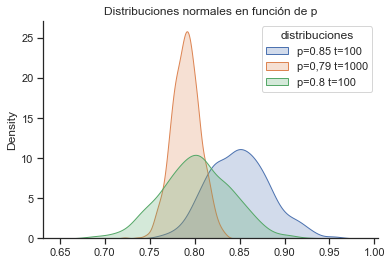

In [136]:
'''Si comparamos las distribuciones entre los 100 tiros y los 1000 tiros
tenemos:'''
fig = sns.kdeplot(np.random.normal(0.85, 0.035,1000),fill=True)
fig = sns.kdeplot(np.random.normal(0.79, 0.016,1000),fill=True)
fig = sns.kdeplot(np.random.normal(0.8, 0.04,1000),fill=True)

plt.title("Distribuciones normales en función de p")
plt.legend(title='distribuciones', loc='upper right', labels=["p=0.85 t=100","p=0,79 t=1000","p=0.8 t=100"])

'''El valor obtenido en los 100 tiros(85 aciertos) es muy poco probable si los datos de la profesora
son correctos. '''

In [ ]:
'''CT 9: 100 tiros 1 una persona: Datos falseados tabla con datos reales
Ronda / Num de aciertos
1,68
2,74
3,78
4,70
5,68
6,63
7,80
8,68
9,67
10,65
Totales : 701 / 1000 
Este caso tiene otro estimador robusto, 1000 tiros registrados. Haciendo la sumatoria de todos
los tiros podemos estimar p =0.701 s=0.0145
Este es el peor estimador
(Cz8/Cz6>Cz3)>Cz7>Cz5>Cz1>Cz2>Cz4>Cz9
''' 


In [138]:
#Parametros en el siguiente orden: Tiros, p, p del mejor 
est_obtenidos = {
    "cz1":[100,0.8,.622],
    "cz2":[100,.8,.517],
    "cz3":[300,.8,.944],
    "cz4":[10,.9,.152],
    "cz5":[100,.78,.85],
    "cz6":[100,.8,.001],
    "cz7":[100,.8,.73289],
    "cz8":[1000,.79,1],
    "cz9":[1000,.701,0],
}

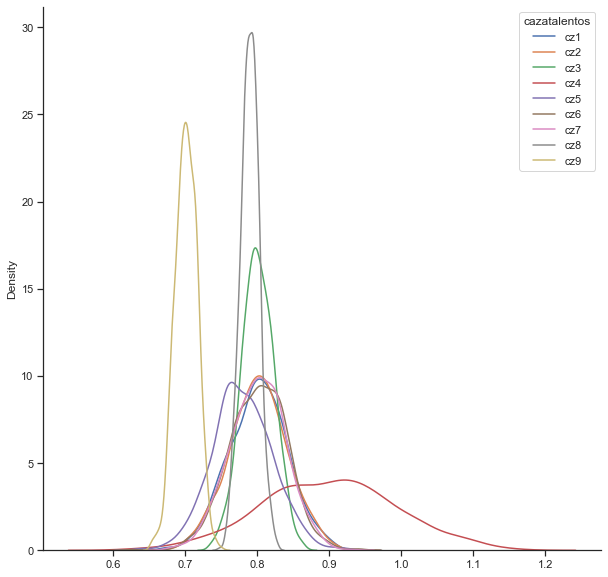

In [154]:
def graficar(cazatalentos, sampleo):
    for cz in cazatalentos:
        desv = desvio_grap(cazatalentos[cz])        
        fig = sns.kdeplot(np.random.normal(cazatalentos[cz][1], desv, sampleo))
        plt.legend(title='cazatalentos', loc='upper right', labels=[x for x in cazatalentos])    
    
    plt.rcParams['figure.figsize']=(30,30)       
    plt.show()
    
graficar(est_obtenidos,1000)

## Conclusiones

El orden elegido es:  
**Cz8/(Cz6>Cz3)>Cz7>Cz1>Cz2>Cz5>Cz4>Cz9**   
      
Se puede hacer una distinción general entre varios de los Cz, pero en última instancia la selección del corte depende de los riesgos y metodologías de comparación adoptadas.   
Si la información brindada por la profesora del **Cz 8** es confiable, es una muy buena candidata, tenemos 1100 tiros disponibles para evaluarla y su p es de 0,79 y s = 0.0145
Luego tenemos los casos de intentos de pocas personas (**Cz 6 y 3**) al ser pocas personas, podemos asumir que los valores obtenidos deberían de ser los valorares medios a diferencia de cuando evaluamos 100 personas o más que los valores más altos van a ser una combinación entre valores medios de jugadoras con p más altos y valores extremos de algunas jugadoras con p más bajos. Estos dos Cz tienen un p aproximado de 0.8 y s =0.04.   
En esta comparación entra el riesgo que uno está dispuesto a correr para obtener un jugador que puede ser potencialmente mejor. La probabilidad de que p=0.8 para estos cazatalentos (**Cz3 y Cz6**) es del 50% pero tiene un limite inferior (alfa = 2.5%) de 0.722 mientras que la jugadora elegida por Cz3 tiene un limite inferior de 0.762. Lo mismo sucede en el limite superior. Para **Cz3/Cz6** esta alrededor de 0.87 (que se pasa del limite superior supuesto en el ejercicio) y **Cz8** 0.81.   
Bajo este supuesto estos valores tienen mayor probabilidad de ser más representativos de los p poblacionales.   
**Cz7** solo tenemos información de la segunda tirada realizada, pero se observan valores bastante altos. Si hay solo una jugadora que se encuentra por sobre el resto, el método de capturar a esa jugadora haciendo el corte en el top 5 es lo que limita la efectividad de este método. Podríamos asumir que los valores obtenidos en el segundo intento son peores que los obtenidos en el primero (por la maldición del ganador) y como los valores obtenidos son bastante altos para un grupo de 5 jugadoras, es probable que sea una buena elección la del **Cz7**.   
**Cz1 y Cz2** son dos casos muy similares, ambos tienen ruido del efecto “pelotón” y hacen que sea más complicado distinguir a la jugadora talentosa del promedio. Dentro de estos supuestos, hacerlo con 100 personas es mejor que hacerlo con 200 (si asumimos que siempre habrá una talentosa y el resto pelotón).   
**Cz5** en este caso podemos ver la maldición del ganador. También vemos que, si consideramos los valores en la segundo y tercer intento, sus medias están alrededor de 75 encestes para 3 de las 5 Jugadoras. En este caso además la selección del Cz no es la mejor. Elige en base al primer resultado y las opciones B y C tienen mejor performance promedio
**Cz4** a pesar de tener el p más grande de todos los calculados con 0.9 tiene el s más grande. 10 tiros no son suficientes para discriminar de forma eficiente a alguien talentoso del pelotón (solo el 15% de las veces si escogemos al primero será la mejor del grupo).   
**Cz9** en este caso también tenemos mucha información y sabemos que es la jugadora menos talentosa con un p de 0.701 y un s de 0.0145
